In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import lhsmdu
import time

from PIL import Image, ImageDraw

## Mandelbrot

s is a sample (pixel/point of plot). i is number of iterations before stating that does not go to infinity, and therefore does not lie within the mandelbrot set. 

Investigates what happens when s and i increase separetly. 

In [4]:
c = complex(2,2)
Z0 = c
Z = Z0

def amount_iter(compl, max_steps, threshold_inf: int = 10):
    c = compl
    z = 0
    i = 0
    while (z*z.conjugate()).real < threshold_inf and i < max_steps:
        z = z**2 + c
        i += 1
    return i

## Plotting the MandelBrot set

In [ ]:
max_steps = 1000 # this is equal to i

# Image size (pixels), this is equal to the amount of samples s
X_WIDTH = 900
Y_HEIGHT = 600

# Plot window
real_minus = -2
real_max = 1
real_dif = real_max - real_minus
imag_minus = -1
imag_max = 1
imag_dif = imag_max - imag_minus

im = Image.new('HSV', (X_WIDTH, Y_HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)
percentage = 0


for pix_x in range(0, X_WIDTH):
    for pix_y in range(0, Y_HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(real_minus + (pix_x / X_WIDTH) * real_dif,
                    imag_minus + (pix_y / Y_HEIGHT) * imag_dif)
        # Compute the number of iterations
        m = amount_iter(c, max_steps)
        # The color depends on the number of iterations
        hue = int(255 * m / max_steps)
        saturation = 255
        if m < max_steps:
            value = 255 
        else:
            value = 0
        # Plot the point
        draw.point([pix_x, pix_y], (hue, saturation, value))
#     if percentage != str(round(pix_x/X_WIDTH,2)):
#         percentage = str(round(pix_x/X_WIDTH,2))
#         print("Percentage: " + percentage + "%")
        
im.convert('RGB').save('output.png', 'PNG')

imgplot = plt.imshow(im.convert('RGB'))

## Monte Carlo

In [5]:
def xy_rand():
    x = 3*np.random.random_sample()-2       # X domain is [-2,1]
    y = 2*np.random.random_sample()-1       # Y domain is [-1,1]
    return x,y 

In [375]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
t = 0
samples = [100, 200, 500, 1000]
listA = [[],[],[],[]]
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for value in range(len(samples)):               # for different sample size
    print("Amount of samples: " + str(samples[value]))
    for max_steps in range(1,maxmax_steps):       # maximum amount of step sizes for each sample
        t = 0
        f = 0
#         print(listA)
        for s in range(samples[value]):         # take samples 
            x, y = xy_rand()
            m = amount_iter(complex(x,y), max_steps)
#             print(m)
            if m == max_steps:
                t += 1
#         print(t)
    #     print(t/it*6)
        listA[value].append(t/samples[value]*6)
#         print(listA)

        
for i in range(len(listA)):
    print(statistics.mean(listA[i]))
    print(statistics.stdev(listA[i]))
    print(listA[i][-1])

Amount of samples: 100
Amount of samples: 200
Amount of samples: 500
Amount of samples: 1000
1.548948948948949
0.3914983247383598
1.44
1.5513213213213213
0.3482830141878864
1.6800000000000002
1.547867867867868
0.3078230215297842
1.344
1.5506186186186186
0.29935082349100556
1.536


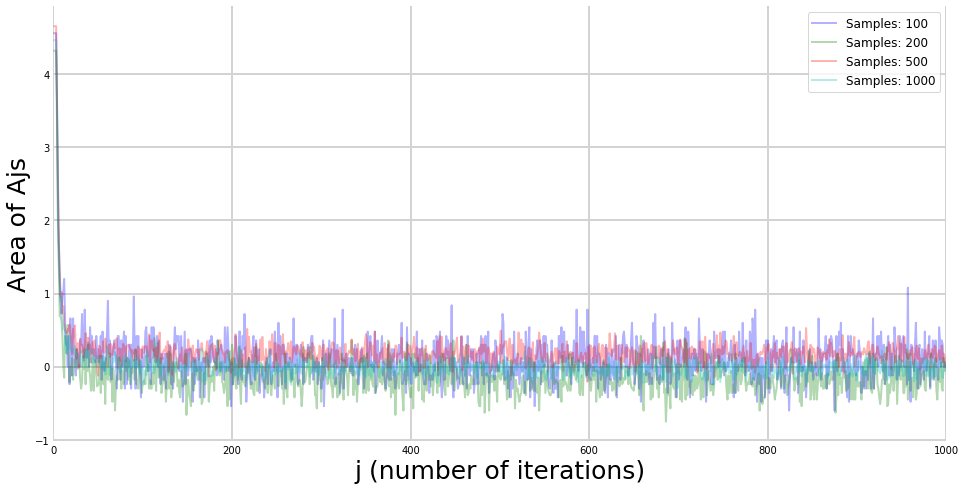

In [377]:
listAdif = [[],[],[],[]]
for value in range(len(samples)):
    for x in range(len(listA[value])):
        listAdif[value].append(listA[value][x])
    for i in range(len(listAdif[value])):
        listAdif[value][i] -= listAdif[value][len(listAdif[value])-1]

colors = ['b', 'g', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
# ax.plot(range(maxmax_steps), listA, 'r', alpha=0.5, lw=2, label='Area(j)')
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps), listAdif[value], color = colors[value], alpha=0.3, lw=2, label= "Samples: " + str(samples[value]))
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Area of Ajs', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="large")
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

In [6]:
samples = 100
dimensions = 2
strength = 2
MAJOR = samples**(1/strength)

def xy_orth():
    long xlist[MAJOR][MAJOR] = {{0}};
    long ylist[MAJOR][MAJOR] = {{0}};
    main()
    {
        int i;
        int j;
        int k;
        int m;
        long double scale = 4.0 / ((long double) SAMPLES);
        double x;
        double y;

        init_genrand(3737);
        m = 0;
        /* Divide the entire area into MAJOR * MAJOR sub-squares */
        /* Divide each subsquare into MAJOR * MAJOR cells */
        /* The first index determines the row/column number of the subsquare */
        /* So xlist[2][5] would indicate what minor column contains the sample
           in the major cell with major column number 2 and major row number 5
           ylist[2][5] will provide its minor row number */

        for (i = 0; i < MAJOR; i++)
        {
            for (j = 0; j < MAJOR; j++)
            {
                xlist[i][j] = ylist[i][j] = m++;
            }
        }
        for (k = 0; k < RUNS; k++)
        {
            for (i = 0; i < MAJOR; i++)
            {
                /* permute will give me a permutation of the list with MAJOR elements */
                /* Due to the way the lists have been created subranges with similar
                   x or y values will stay together
                   xlist[i] is a pointer to the start of the 1D array xlist[i][0] ... xlist[i][MAJOR - 1]
                 */
                permute(xlist[i], MAJOR);
                permute(ylist[i], MAJOR);
            }
            for (i = 0; i < MAJOR; i++)   /* Subsquare column */
            {
                for (j = 0; j < MAJOR; j++)  /* Subsquare row */
                {
                    /* For a given subsquare column (i) every subsquare has its sample in
                       a different column of cells (as determined by xlist[i][j]
                       The random long double value selects a random point in the minor subsquare
                     */
                    x = -2.0 + scale * (xlist[i][j] + (long double) genrand_real2());

                    /* For a given subsquare row, every subsquare has its sample in a different 
                       row of cells */
                    y = -2.0 + scale * (ylist[j][i] + (long double) genrand_real2());

                    /* Do the desired computation with with x and y at this point in the code */
                }
            }
        }
        /* Postprocessing */
        return 0;
    }



SyntaxError: invalid syntax (<ipython-input-6-6f7fd9cbccb1>, line 7)

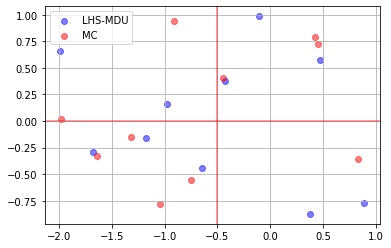

In [7]:
def xy_LHS(x):
    l = lhsmdu.sample(2,x)
    x,y = (l[0][0]), (l[1][0])
    x = x.tolist()
    x = x[0]
    for xind in range(len(x)):
        x[xind] = 3*x[xind]-2
    y = y.tolist()
    y = y[0]
    for yind in range(len(y)):
        y[yind] = 2*y[yind]-1
    return x,y


x_LHS,y_LHS = xy_LHS(10)

xlist = []
ylist = []
for i in range(10):
    x, y = xy_rand()
#     x = (x+ 2)/3
#     y = (y + 1)/2
    xlist.append(x)
    ylist.append(y)
    
plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

plt.legend()
plt.grid()
plt.show()

In [ ]:
## Approximation by LHS

start = time.time()

samples = [100, 200, 500, 1000]
listLHS = [[],[],[],[]]
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for value in range(len(samples)):
    print("Amount of samples: " + str(samples[value]))
    for max_steps in range(maxmax_steps):
        t = 0
        x_LHS,y_LHS = xy_LHS(samples[value])
        if max_steps%100 == 0:
            print("Percentage: "+ str(max_steps/maxmax_steps * 100) + "%")
        for index in range(len(x_LHS)):
#             print(index)
            x, y = x_LHS[index], y_LHS[index]
            m = amount_iter(complex(x,y), max_steps)
            if m == max_steps:
                t += 1
    #     print(t/it*6)
        listLHS[value].append(t/samples[value]*6)

        
for i in range(len(samples)):
    print(statistics.mean(listLHS[i]))
    print(statistics.stdev(listLHS[i]))
    print(listLHS[i][-1])

end = time.time()
print("Running time: " + str(end - start))

Amount of samples: 100
Percentage: 0.0%
Percentage: 10.0%
Percentage: 20.0%
Percentage: 30.0%
Percentage: 40.0%
Percentage: 50.0%


In [ ]:
safe_of_listLHS = [[],[],[],[]]
for value in range(len(samples)):
    for x in range(len(listLHS[value])):
        safe_of_listLHS[value].append(listLHS[value][x])
    for i in range(len(safe_of_listLHS[value])):
        safe_of_listLHS[value][i] -= listLHS[value][len(listAdif[value])-1]

print(safe_of_listLHS[1])